 # Hierarchical clustering- example

Mental health is an important aspect of the process of individual adaptation and development. Well-being is a positive mental health indicators that can be defined as an effect of the cognitive and emotional assessment of one’s own life,
consisting of a high level of fulfilment in multiple areas.

Another significant role in determining one’s mental health is resilience. Resilience might be seen as a personality trait—a positive, distinct feature of an individual that mitigates the negative effects of stress and minimises episodes of depression . Resilience has also been conceptualised as a process that encompasses positive adaptation within the context of adversity.

The aim of this project is to cluster the participants by using the `Hierarchical clustering algorithm`.

We utilized a preexisting dataset provided by Konaszewski et al. (Konaszewski K, Niesiobędzka M, Surzykiewicz J. Resilience and mental health among juveniles: role of strategies for coping with stress. Health Qual Life Outcomes. 2021 Feb 18;19(1):58) https://doi.org/10.3886/E120001V1. They investigate the direct and indirect role of resilience in shaping the mental health of juveniles. The dataset includes `resilience`, `well-being` and 14 `coping strategies`.




In [ ]:
# Importing the libraries  
import numpy as np 
import pandas as pd  
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [9]:
df, meta=pyreadstat.read_sav('konzas2.sav')

In [13]:
df=df.dropna()

In [14]:
df.head(3)

,wb1,wb2,wb3,wb4,wb5,wb6,wb7,wb8,wb9,wb10,...,Behavioral_disengagement,Venting,Positive_reframing,Planning,Humor,Acceptance,Religion,Self_blame,res,well
0,2.0,2.0,3.0,3.0,3.0,2.0,3.0,4.0,2.0,3.0,...,2.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,62.0,42.0
1,4.0,5.0,4.0,5.0,4.0,3.0,4.0,4.0,4.0,3.0,...,3.0,5.0,3.0,1.0,3.0,4.0,4.0,3.0,80.0,56.0
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,2.0,3.0,3.0,1.0,4.0,2.0,2.0,68.0,44.0


In [15]:
x = df.loc[:, ['res','well']].values 

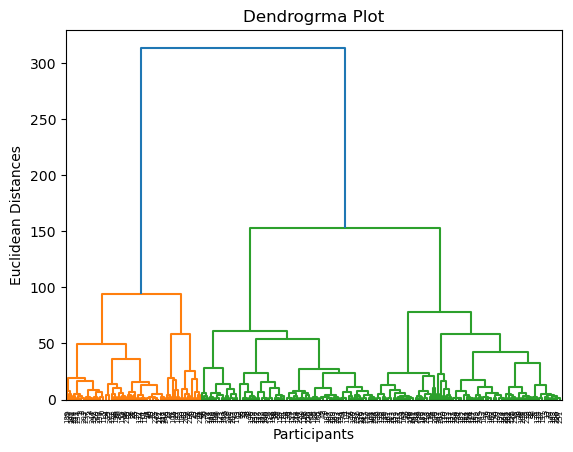

In [17]:
#Finding the optimal number of clusters using the dendrogram  
    
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Participants")  
plt.show() 

<div class="alert alert-block alert-info">

It is observed  that choosing three clusters is suitable for clustering the paticipants.

</div>

In [21]:
#training the hierarchical model on dataset  
     
hc= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)

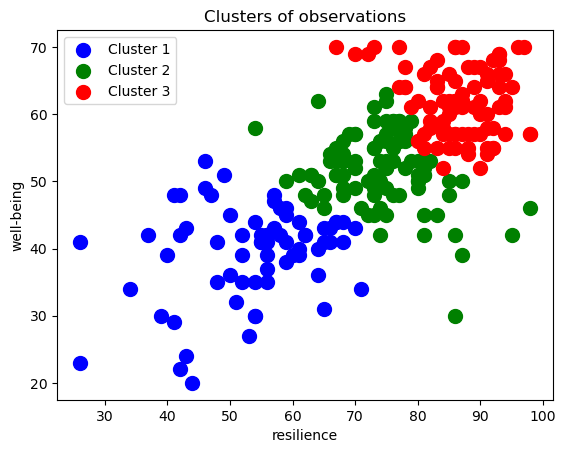

In [22]:
#visulaizing the clusters  
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  

plt.title('Clusters of observations')  
plt.xlabel('resilience')  
plt.ylabel('well-being')  
plt.legend()  
plt.show()  

In [23]:
df["label"] = y_pred
avg_df = df.groupby(['label'], as_index=False).mean() 
avg_df

,label,wb1,wb2,wb3,wb4,wb5,wb6,wb7,wb8,wb9,...,Behavioral_disengagement,Venting,Positive_reframing,Planning,Humor,Acceptance,Religion,Self_blame,res,well
0,0,2.594203,2.594203,2.579710,3.333333,3.086957,2.391304,2.608696,2.768116,2.826087,...,2.594203,3.202899,2.565217,2.840580,2.289855,3.173913,1.782609,3.376812,53.811594,39.507246
1,1,3.505263,3.473684,3.263158,4.094737,3.936842,3.178947,3.336842,3.715789,3.694737,...,2.073684,3.515789,3.968421,3.947368,2.473684,4.200000,2.073684,2.789474,74.052632,51.768421
2,2,4.382022,4.213483,4.022472,4.696629,4.539326,4.269663,4.258427,4.483146,4.415730,...,1.359551,3.494382,4.662921,4.786517,2.741573,4.988764,2.348315,2.247191,86.415730,61.786517


<Axes: xlabel='label', ylabel='res'>

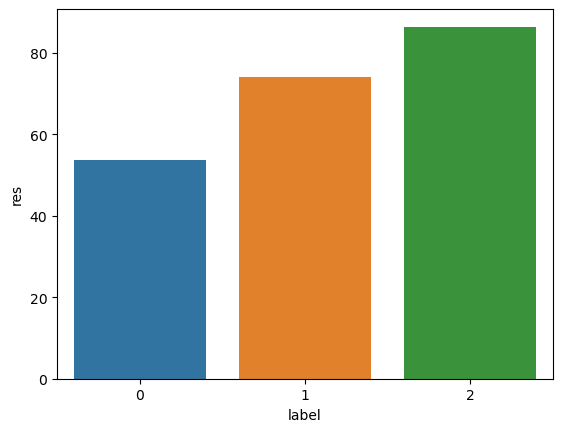

In [24]:
# visualizing the mean of resilience in each cluster
sns.barplot(x='label',y='res', data=avg_df)

<Axes: xlabel='label', ylabel='well'>

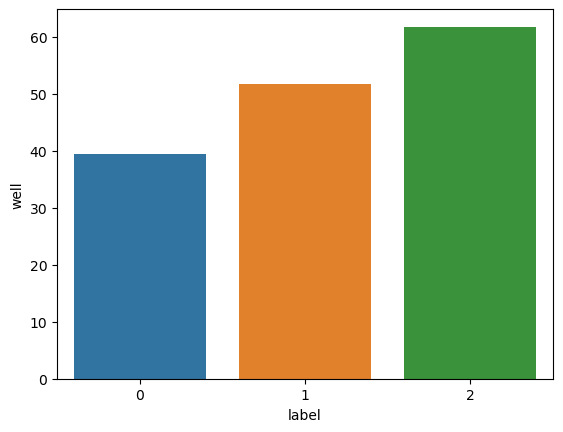

In [25]:
sns.barplot(x='label',y='well', data=avg_df)

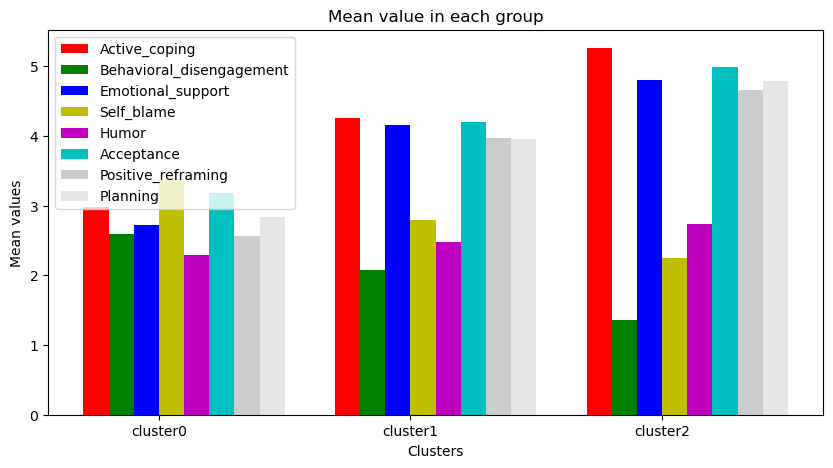

In [26]:
# visualizing the mean of features in each cluster

N = 3
ind = np.arange(3) 
width = 0.25
plt.figure(figsize=(10,5))
xvals = avg_df["Active_coping"] 
bar1 = plt.bar(ind, xvals, width=0.1, color = 'r') 

yvals = avg_df["Behavioral_disengagement"]
bar2 = plt.bar(ind+0.1, yvals, width=0.1, color='g') 

zvals = avg_df["Emotional_support"]
bar3 = plt.bar(ind+0.2, zvals, width=0.1, color = 'b') 

wvals = avg_df["Self_blame"]
bar4 = plt.bar(ind+0.3, wvals, width=0.1, color = 'y') 

tvals = avg_df["Humor"]
bar5 = plt.bar(ind+0.4, tvals, width=0.1, color = 'm')

svals = avg_df["Acceptance"]
bar6 = plt.bar(ind+0.5, svals, width=0.1, color = 'c')

bvals = avg_df["Positive_reframing"]
bar7 = plt.bar(ind+0.6, bvals, width=0.1, color = '0.8')

dvals = avg_df["Planning"]
bar8 = plt.bar(ind+0.7, dvals, width=0.1, color = '0.9') 

plt.xlabel("Clusters") 
plt.ylabel('Mean values') 
plt.title("Mean value in each group") 

plt.xticks(ind+width,['cluster0', 'cluster1', 'cluster2']) 
plt.legend( (bar1, bar2, bar3, bar4, bar5, bar6, bar7,bar8), ('Active_coping', 'Behavioral_disengagement', 
                                                         'Emotional_support','Self_blame','Humor','Acceptance','Positive_reframing','Planning') ) 
plt.show() 


### Main attributes of each cluster

Cluster 2:
This cluster includes juveniles with the most resilience and well-being. They had high average for **Active_coping, Emotional_support, Acceptance,  planning** and **Positive_reframing** and low average in *Behavioral_disengagement*, *Self_blame* and *Humor*.

Cluster 1:
juveniles with the moderate resilience and well-being. This group had moderate average in almost all features and high average for *Active_coping*, *Emotional_support* and *Acceptance*.

Cluster 2:
This group had the lowest value of resilience and well-being characteristic. Active_coping, Emotional_support, Acceptance,  planning and Positive_reframing were minimum for these  juveniles.